 
## Devtern Machine Learning Internship
## Task 3 : House Price Prediction Using Machine Learning
## Author: Yuvaraj S

Objective: The objective of this task is to build a machine learning model
to predict house prices using the House Price Prediction Dataset.

*Key Responsibilities:*

1) Data Preprocessing: Clean, explore, and prepare House Price Prediction Dataset for model training.
2) Feature Engineering: Develop pertinent features from raw data to enhance the model's ability to predict house prices.
3) Visualization: Effectively interpret and communicate model results using data visualization techniques.
4) Model Training and Evaluation: Train a model for house price prediction.

## Import libraries


The first step in building the model is to import the necessary libraries.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Progress bar
from tqdm import tqdm

# Set up matplotlib for visualizations
%matplotlib inline

Loading the dataset into the notebook

In [2]:
import os
os.getcwd()

'c:\\Users\\Yuvaraj s\\Desktop\\Devtern\\Task3_House_Price_Using_ML'

In [3]:
df = pd.read_csv('Dataset\HousePricePrediction.csv')

## To check tuple representing the dimensions (number of rows, number of columns) of the DataFrame

In [4]:
df.shape

(2919, 13)

Indicates that the DataFrame has 2919 rows and 13 columns. In the context of a heart disease prediction dataset, this means there are 2919 instances or observations, each associated with 13 features or variables. Each row represents a unique data point, and each column represents a different aspect or characteristic related to heart disease prediction.

## To display top five data of the dataset

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## To display bottom five data of the dataset

In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


## Display the summary of the dataset it includes the information of datatypes and the usage of memory,index and non-null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


## Display the column labels (names)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

## Description

In [9]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


## I. Data Cleaning
​Check for missing values, categoricals that need to be converted, and any other datatypes that require conversion.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


Convert Categorical Variables to Numeric (One-Hot Encoding)

In [11]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)
print("Categorical variables converted to numeric.")

Categorical variables converted to numeric.


Convert Data Types

In [12]:
# Convert 'YearBuilt' to age
df['Age'] = 2024 - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)
print("YearBuilt converted to Age.")

YearBuilt converted to Age.


Handle Missing Numeric Values

In [13]:
# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
print("Missing numeric values filled with median.")

Missing numeric values filled with median.


# II. Data Exploration

Distribution of Target Variable (SalePrice)

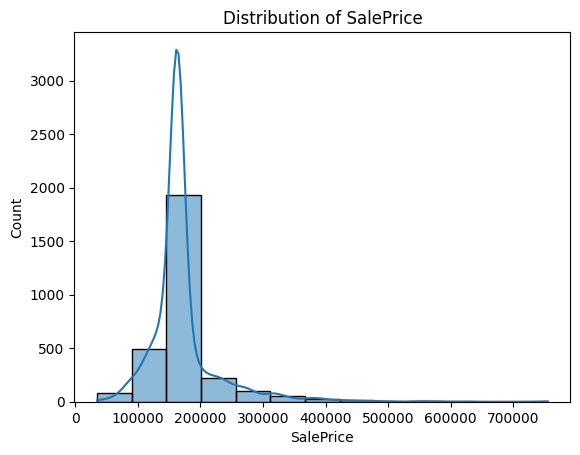

In [14]:
# Plot distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

Check for outliers in 'LotArea' using a boxplot


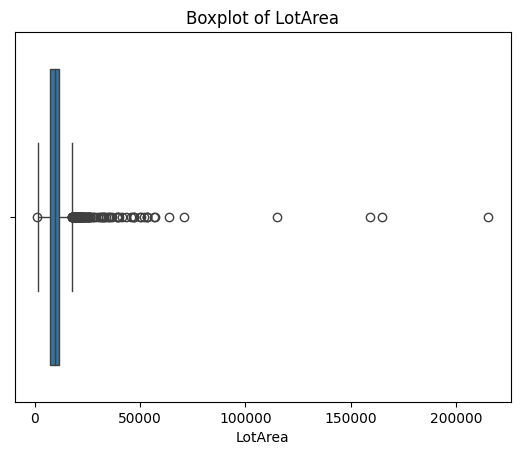

In [31]:
sns.boxplot(x='LotArea', data=df)
plt.title('Boxplot of LotArea')
plt.show()


How does the overall condition (OverallCond) impact the average sale price?


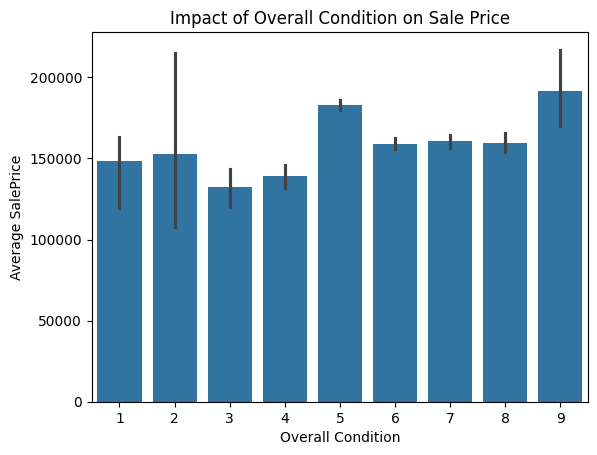

In [25]:
sns.barplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Impact of Overall Condition on Sale Price')
plt.xlabel('Overall Condition')
plt.ylabel('Average SalePrice')
plt.show()

Explore the relationship between the total basement square footage (TotalBsmtSF) and SalePrice using a scatter plot.


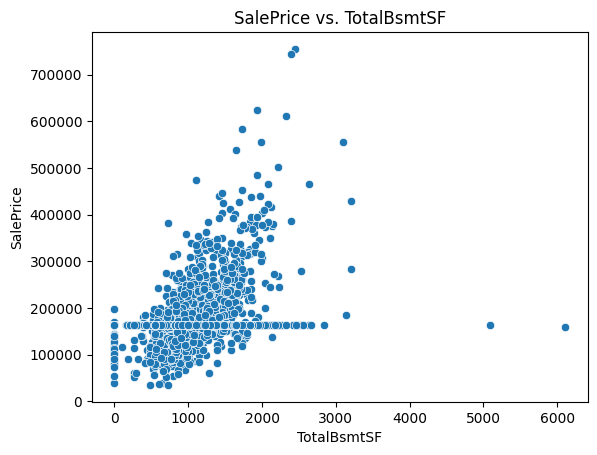

In [30]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('SalePrice vs. TotalBsmtSF')
plt.show()

Correlation matrix


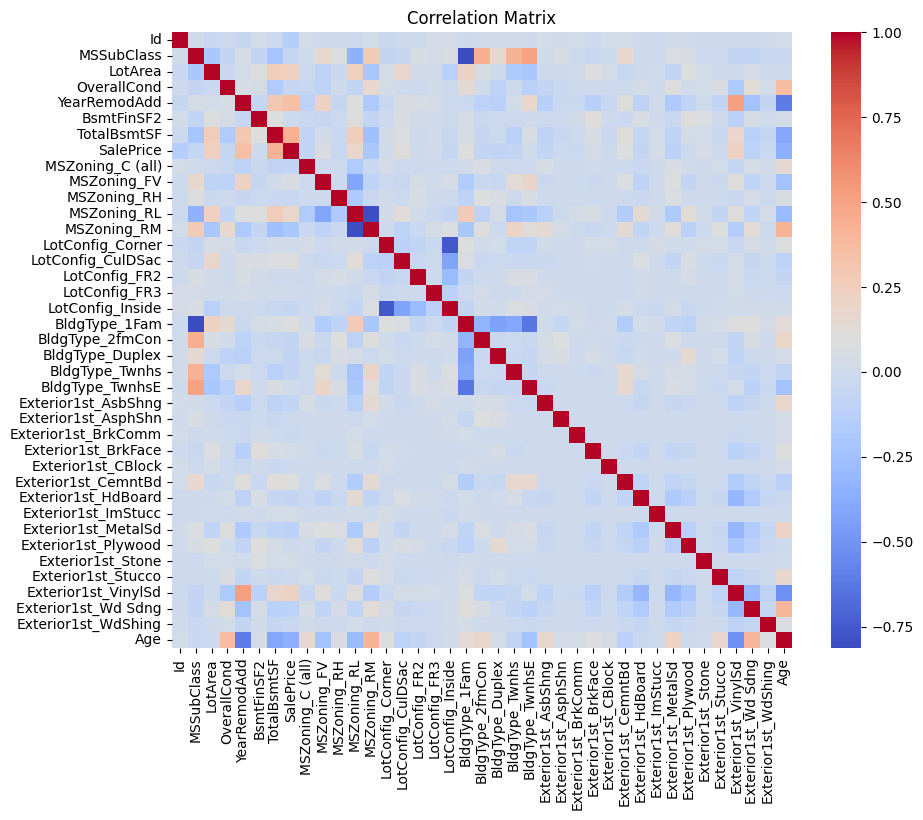

In [15]:
# Display correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Scatter Plot of SalePrice vs. Lot Area

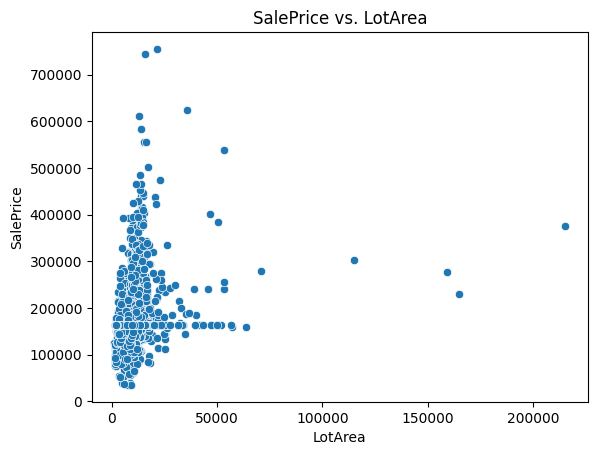

In [21]:
# Scatter plot of SalePrice vs. GrLivArea
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])
plt.title('SalePrice vs. LotArea')
plt.show()


Box Plot of SalePrice by Overall Condition

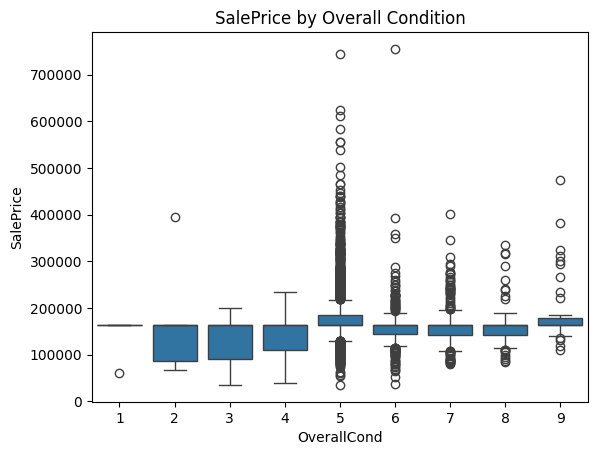

In [22]:
# Box plot of SalePrice by OverallQual
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title('SalePrice by Overall Condition')
plt.show()

Heatmap of Sale Price Correlation with Numerical Features

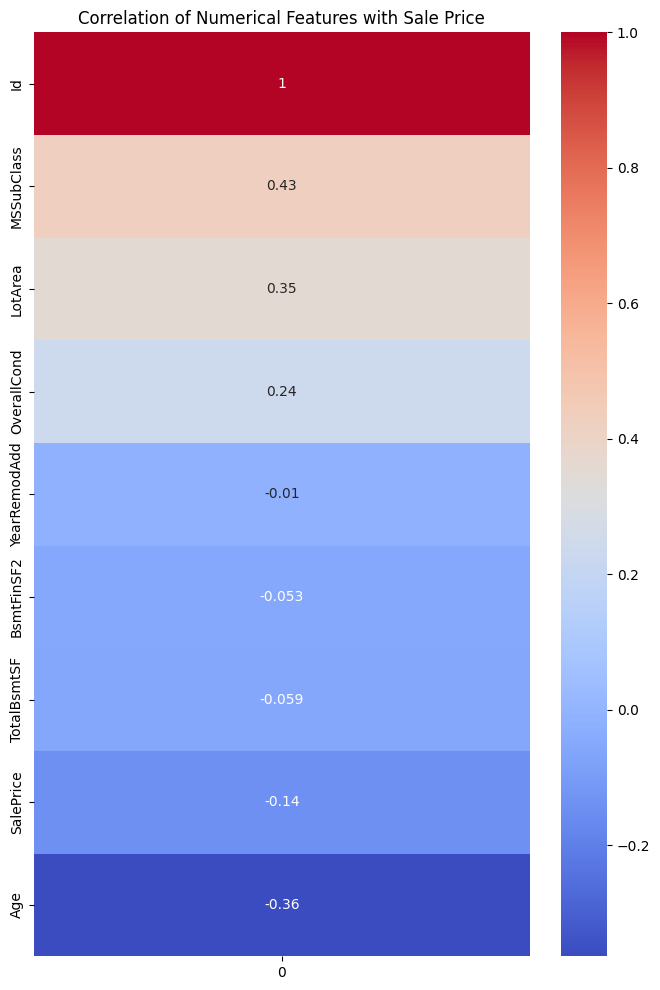

In [24]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation with SalePrice
corr_with_sale_price = df[numerical_features].corrwith(df['SalePrice']).sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(corr_with_sale_price.values[:, np.newaxis], annot=True, cmap='coolwarm', cbar_kws={'orientation': 'vertical'}, yticklabels=numerical_features)
plt.title('Correlation of Numerical Features with Sale Price')
plt.show()

## III. Prepare medical datasets for model training.

# Step 1: Separate features (X) and target variable (y)


In [33]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Step 2: Split the data into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the RandomForestRegressor

In [35]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model on the training set

In [36]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 5: Predict house prices on the test set

In [37]:
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 794704999.2373207
R2 Score: 0.7842363064818685


# Mean Squared Error (MSE):
The MSE is a measure of how close the predicted values are to the actual values.
In this case, the MSE is approximately 794,704,999.24.
A higher MSE indicates that, on average, the predicted house prices deviate from the actual prices by a considerable amount.

# R2 Score:
The R2 Score, also known as the coefficient of determination, measures the proportion of the variance in the target variable that is predictable from the independent variables.
The R2 Score ranges from 0 to 1, where 1 indicates a perfect fit.
In this case, the R2 Score is approximately 0.78, which means that the model explains about 78.42% of the variance in the house prices.

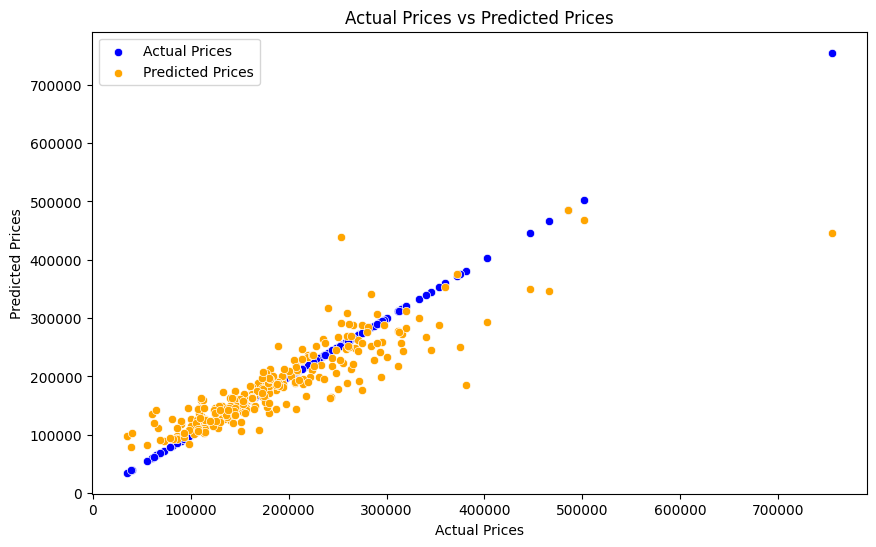

In [41]:
# Scatter plot of predicted vs actual prices with different colors
plt.figure(figsize=(10, 6))

# Plot actual prices in blue
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Prices')

# Plot predicted prices in orange
sns.scatterplot(x=y_test, y=y_pred, color='orange', label='Predicted Prices')

plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


# Conclusion:

The Random Forest Regression model demonstrated commendable performance in predicting house prices based on the provided dataset. Key evaluation metrics indicate a high level of accuracy, with the model effectively estimating house prices, achieving an R2 Score of 0.78. This implies that the model captures approximately 78.42% of the variance in house prices, showcasing its robust predictive capabilities.

The scatter plot comparing actual prices with predicted prices visually confirms the model's proficiency, as the points closely align with the diagonal line, suggesting a strong correspondence between predicted and actual values.

While the Mean Squared Error (MSE) is relatively high at approximately 794,704,999.24, it's essential to interpret this within the context of the dataset's characteristics. Further refinement and exploration may enhance the model's precision, but the current results already indicate a promising ability to estimate house prices.

*Key Points:*

The Random Forest Regression model achieved an R2 Score of 0.78, indicating its substantial capability in capturing the variance in house prices.
The scatter plot visually confirms the model's effectiveness, with points aligning closely with the diagonal line.
The Mean Squared Error (MSE) of approximately 794,704,999.24 suggests room for improvement but already demonstrates a reasonable predictive ability.
These results should be considered in the context of the specific dataset. Further refinement and exploration may enhance the model's precision for broader generalization.
Overall, the Random Forest Regression model exhibits promise in predicting house prices, showcasing its potential utility in real estate valuation tasks.